# Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler,RobustScaler

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer, make_column_selector

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split, cross_val_score, cross_validate

# Retrieve data

In [2]:
dataset = pd.read_csv('../raw_data/HR_Engagement_Sat_Sales_UpdatedV4.0.csv')

In [3]:
pd.set_option('display.max_columns', None)
dataset.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


# Exploring the dataset

## Hypothesis 0 : Drop NAME column

In [4]:
print(f"The dataset shape BEFORE Hypothesis 0 : {dataset.shape}")
dataset = dataset.drop(columns=['Name'])
print(f"The following column has been dropped : 'Name'")
print(f"The dataset shape AFTER Hypothesis 0 : {dataset.shape}")

The dataset shape BEFORE Hypothesis 0 : (14999, 62)
The following column has been dropped : 'Name'
The dataset shape AFTER Hypothesis 0 : (14999, 61)


## Count non-NA/null values of dataset

In [5]:
def extract_col_fulfillment(dataframe : pd.DataFrame, 
                            above_below_equal : str = None, 
                            threshold : int = None):
    ''' 
    This function takes as inputs: 
    - a pandas dataframe
    - an optional string parameter (string parameter and integer parameter MUST BE defined if used)
    - an optional integer parameter (string parameter and integer parameter MUST BE defined if used)
    
     This function returns:
     - the percentage of fulfillment (with non NAN/null values)
         of each columns of input dataframe
     - the percentage of fulfillment (with non NAN/null values)
         of each columns of input dataframe (based on above_below_equal and threshold, is specified)
    '''
    
    assert isinstance(dataframe, pd.DataFrame), f"{dataframe} sould be a pandas dataframe"
    if above_below_equal != None :
        assert isinstance(above_below_equal, str), f"{above_below_equal} sould be a string"
        assert above_below_equal in ['below','above','equal'], f"{above_below_equal} sould be either 'below' or 'above'"
    if threshold != None:
        assert isinstance(threshold, int), f"{threshold} sould be an integer"
        
        
    fulfillment = (dataset.count()/len(dataset)*100).sort_values()
    
    if above_below_equal != None and threshold != None:
        if above_below_equal == 'above':
            fulfillment = fulfillment[fulfillment > threshold]
        elif above_below_equal == 'below':
            fulfillment = fulfillment[fulfillment < threshold]
        else:
            fulfillment = fulfillment[fulfillment == threshold]
    
    return fulfillment

In [6]:
# Threshold to extract columns based on fulfillment (in percent) 
# It can be used to extract columns with 'threshold'% of fulfillment (higher or lower -> See 'above_below' variable)
above_below_equal = 'below'
threshold = 100

In [7]:
# print(f"Columns whose number of non NAN/null values are {above_below} {threshold}% : \n ")
# print(extract_col_fulfillment(dataset,above_below_equal, threshold))

In [8]:
# Extraction of columns that have fulfillment lower/higher than threshold
fulfilled_cols = extract_col_fulfillment(dataset, above_below_equal, threshold)
fulfilled_cols_names = fulfilled_cols.index.to_list()
fulfilled_cols_names;

In [9]:
print(f"There are {len(fulfilled_cols_names)} columns, that are {above_below_equal} to {threshold}% : " )
extract_col_fulfillment(dataset,above_below_equal, threshold)

There are 10 columns, that are below to 100% : 


Rising_Star          0.140009
Critical             3.200213
CSR Factor          11.420761
Men_Leave           32.435496
Women_Leave         50.643376
EMP_Sat_OnPrem_5    99.146610
EMP_Sat_OnPrem_4    99.146610
EMP_Sat_OnPrem_3    99.146610
EMP_Sat_OnPrem_2    99.146610
EMP_Sat_OnPrem_1    99.146610
dtype: float64

## Hypothesis 1 : Drop low filled columns

In [10]:
print(f"The dataset shape BEFORE Hypothesis 1 : {dataset.shape}")
dataset = dataset.drop(columns=fulfilled_cols_names)
print(f"The following columns have been dropped : {fulfilled_cols_names}")
print(f"The dataset shape AFTER Hypothesis 1 : {dataset.shape}")

The dataset shape BEFORE Hypothesis 1 : (14999, 61)
The following columns have been dropped : ['Rising_Star', 'Critical', 'CSR Factor', 'Men_Leave', 'Women_Leave', 'EMP_Sat_OnPrem_5', 'EMP_Sat_OnPrem_4', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_1']
The dataset shape AFTER Hypothesis 1 : (14999, 51)


## Check unique values in each column

In [11]:
# Check for constant values <=> standard deviation == 0
zero_std_cols = dataset.std(axis=0, numeric_only=True)[dataset.std(axis=0, numeric_only=True) == 0]
zero_std_cols

Trending Perf             0.0
Talent_Level              0.0
Validated_Talent_Level    0.0
dtype: float64

In [12]:
#Check the mean value of the columns with standard deviation == 0
unique_value_cols = dataset.mean(axis=0, numeric_only=True)[zero_std_cols.index]

In [13]:
print(f"There are {len(zero_std_cols)} numerical columns which have a standard deviation equal to 0.\n")
print("These columns can be considered as unique value columns : \n")
print(unique_value_cols)

There are 3 numerical columns which have a standard deviation equal to 0.

These columns can be considered as unique value columns : 

Trending Perf             3.0
Talent_Level              6.0
Validated_Talent_Level    6.0
dtype: float64


In [14]:
unique_value_cols_names = unique_value_cols.index.to_list()
unique_value_cols_names

['Trending Perf', 'Talent_Level', 'Validated_Talent_Level']

## Hypothesis 2 : Drop columns with unique single value

In [15]:
print(f"The dataset shape BEFORE Hypothesis 2 : {dataset.shape}")
dataset = dataset.drop(columns=unique_value_cols_names)
print(f"The following columns have been dropped : {unique_value_cols_names}")
print(f"The dataset shape AFTER Hypothesis 2 : {dataset.shape}")

The dataset shape BEFORE Hypothesis 2 : (14999, 51)
The following columns have been dropped : ['Trending Perf', 'Talent_Level', 'Validated_Talent_Level']
The dataset shape AFTER Hypothesis 2 : (14999, 48)


## Correlations

In [16]:
dataset.head()

,ID,Department,GEO,Role,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,Operations,US,VP,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,low,M,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,Sales,UK,Senior Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,Finance,France,Senior Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,Human Resources,China,Senior Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,IT,Korea,Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [17]:
# correlation_df = dataset.drop(columns=['left_Company'])
# sns.heatmap(correlation_df.corr(), cmap='coolwarm')

# Define X and y

In [18]:
dataset = dataset.drop(columns=['ID'])
dataset.head()

,Department,GEO,Role,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,Operations,US,VP,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,0,sales,low,M,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,Sales,UK,Senior Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,0,accounting,low,F,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,Finance,France,Senior Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,Human Resources,China,Senior Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,IT,Korea,Director,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,0,sales,low,F,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [19]:
dataset.shape

(14999, 47)

In [20]:
X = dataset.drop(columns=['left_Company'])
X.shape

(14999, 46)

In [21]:
y = dataset['left_Company']
y.shape

(14999,)

In [22]:
X.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 46 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Department                             14999 non-null  object 
 1   GEO                                    14999 non-null  object 
 2   Role                                   14999 non-null  object 
 3   Will_Relocate                          14999 non-null  int64  
 4   Percent_Remote                         14999 non-null  float64
 5   EMP_Sat_Remote_1                       14999 non-null  int64  
 6   EMP_Sat_Remote_2                       14999 non-null  int64  
 7   EMP_Sat_Remote_3                       14999 non-null  int64  
 8   EMP_Sat_Remote_4                       14999 non-null  int64  
 9   EMP_Sat_Remote_5                       14999 non-null  int64  
 10  EMP_Engagement_1                       14999 non-null  int64  
 11  EM

# Balancing of y (to be defined)

# Encoding object type columns

In [23]:
X_obj = X.select_dtypes(include=[object])
X_obj.head()

,Department,GEO,Role,sales,salary,Gender
0,Operations,US,VP,sales,low,M
1,Sales,UK,Senior Director,accounting,low,F
2,Finance,France,Senior Director,product_mng,medium,F
3,Human Resources,China,Senior Director,product_mng,high,M
4,IT,Korea,Director,sales,low,F


In [24]:
X_obj.shape

(14999, 6)

In [25]:
one_hot_encoder = OneHotEncoder(sparse_output = False, drop = "if_binary") 
one_hot_encoder.fit(X_obj)

OneHotEncoder(drop='if_binary', sparse_output=False)

In [26]:
# Display the generated names
print(f"The column names for the encoded values are {one_hot_encoder.get_feature_names_out()}")

The column names for the encoded values are ['Department_Finance' 'Department_Human Resources' 'Department_IT'
 'Department_Operations' 'Department_Sales' 'Department_Warehouse'
 'GEO_Australia' 'GEO_China' 'GEO_Colombia' 'GEO_France' 'GEO_Japan'
 'GEO_Korea' 'GEO_Turkey' 'GEO_UK' 'GEO_US' 'Role_Director' 'Role_Level 1'
 'Role_Level 2-4' 'Role_Manager' 'Role_Senior Director'
 'Role_Senior Manager' 'Role_VP' 'sales_IT' 'sales_RandD'
 'sales_accounting' 'sales_hr' 'sales_management' 'sales_marketing'
 'sales_product_mng' 'sales_sales' 'sales_support' 'sales_technical'
 'salary_high' 'salary_low' 'salary_medium' 'Gender_M']


In [27]:
# Transform the current column
X_obj[one_hot_encoder.get_feature_names_out()] = one_hot_encoder.transform(X_obj)
X_obj.head()

,Department,GEO,Role,sales,salary,Gender,Department_Finance,Department_Human Resources,Department_IT,Department_Operations,Department_Sales,Department_Warehouse,GEO_Australia,GEO_China,GEO_Colombia,GEO_France,GEO_Japan,GEO_Korea,GEO_Turkey,GEO_UK,GEO_US,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,Gender_M
0,Operations,US,VP,sales,low,M,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,Sales,UK,Senior Director,accounting,low,F,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,Finance,France,Senior Director,product_mng,medium,F,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,Human Resources,China,Senior Director,product_mng,high,M,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,IT,Korea,Director,sales,low,F,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [28]:
X_obj.shape

(14999, 42)

In [29]:
X_obj.select_dtypes(include=[object]).columns

Index(['Department', 'GEO', 'Role', 'sales', 'salary', 'Gender'], dtype='object')

In [30]:
X_obj =X_obj.drop(columns=X_obj.select_dtypes(include=[object]).columns)
X_obj.head()

,Department_Finance,Department_Human Resources,Department_IT,Department_Operations,Department_Sales,Department_Warehouse,GEO_Australia,GEO_China,GEO_Colombia,GEO_France,GEO_Japan,GEO_Korea,GEO_Turkey,GEO_UK,GEO_US,Role_Director,Role_Level 1,Role_Level 2-4,Role_Manager,Role_Senior Director,Role_Senior Manager,Role_VP,sales_IT,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_high,salary_low,salary_medium,Gender_M
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
4,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [31]:
X_obj.shape

(14999, 36)

In [32]:
X_obj.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Department_Finance          14999 non-null  float64
 1   Department_Human Resources  14999 non-null  float64
 2   Department_IT               14999 non-null  float64
 3   Department_Operations       14999 non-null  float64
 4   Department_Sales            14999 non-null  float64
 5   Department_Warehouse        14999 non-null  float64
 6   GEO_Australia               14999 non-null  float64
 7   GEO_China                   14999 non-null  float64
 8   GEO_Colombia                14999 non-null  float64
 9   GEO_France                  14999 non-null  float64
 10  GEO_Japan                   14999 non-null  float64
 11  GEO_Korea                   14999 non-null  float64
 12  GEO_Turkey                  14999 non-null  float64
 13  GEO_UK                      149

In [33]:
X_obj.shape

(14999, 36)

In [34]:
X_obj.dtypes.value_counts()

float64    36
Name: count, dtype: int64

# Scaling

In [35]:
X_num = X.select_dtypes(exclude=[object])
X_num.head()

,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,5,4,3,1,1,1,1,2,1,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,58,3,3,4,3,2,1,2,1,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,42,2,4,1,3,1,1,2,2,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,37,3,1,4,5,2,1,2,1,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,0,0.4,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,6,4,5,4,5,1,1,2,1,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [36]:
X_num.shape

(14999, 40)

## Check Standard Scaler

In [37]:
std_scaler = StandardScaler().set_output(transform="pandas")
std_scaler.fit(X_num)

StandardScaler()

In [38]:
X_num_std = std_scaler.transform(X_num)
X_num_std

,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-0.651538,-0.661782,-0.341235,2.432112,-0.147412,-0.713863,0.706023,-0.010208,-1.413786,-1.417496,-1.115417,-1.104762,0.001849,-1.156345,-0.151123,0.714878,-0.139760,-0.710533,-0.698923,-0.693458,0.374196,-0.708174,-1.421983,1.404261,-0.891785,-2.339462,1.004882
1,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,0.971113,-0.841993,-1.026126,-0.411165,-0.147412,2.077564,-0.001320,-0.010208,0.700761,-0.002029,-0.138132,-1.104762,0.001849,-1.156345,-0.151123,-0.696807,-1.110253,0.711860,-1.407004,0.014490,0.374196,1.419469,-1.421983,1.404261,-0.806918,1.659100,0.618484
2,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-1.462863,1.620892,-0.341235,-0.411165,-0.147412,1.234869,-0.708664,0.695373,-1.413786,-0.002029,-1.115417,-1.104762,0.001849,0.011602,-1.119792,1.420721,-1.110253,-0.710533,1.425321,-0.693458,0.374196,0.710255,0.705460,0.696134,-0.121715,0.280286,0.618484
3,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,0.159788,1.540798,0.343655,2.432112,-0.147412,0.971527,-0.001320,-1.421371,0.700761,1.413438,-0.138132,-1.104762,0.001849,-1.156345,-1.119792,-1.402650,-0.139760,1.423057,-1.407004,-1.401407,0.374196,0.710255,0.705460,-1.428244,-0.090388,-0.133359,-0.154312
4,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,1.782438,1.100282,1.028546,-0.411165,-0.147412,-0.661195,0.706023,1.400954,0.700761,1.413438,-1.115417,-1.104762,0.001849,-1.156345,-1.119792,0.714878,-1.110253,1.423057,0.009158,1.430387,-0.781604,-0.708174,1.414607,0.696134,-0.146777,0.280286,1.391280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1.000333,1.974255,2.783762,0.679940,0.679940,2.131859,0.019308,-1.788917,-1.788917,-1.788917,-1.788917,-1.788917,1.658639,0.159788,1.020188,1.028546,-0.411165,-0.147412,-0.924537,-1.416007,-0.715789,-0.708937,-0.709763,-0.138132,-1.104762,0.001849,-1.156345,-1.119792,-1.402650,-0.139760,0.000664,-0.698923,0.722439,0.374196,-0.708174,-0.003688,-1.428244,-1.064368,1.383337,1.004882
14995,1.000333,1.974255,2.783762,0.679940,0.679940,2.131859,0.019308,-1.788917,-1.788917,-1.788917,-1.788917,-1.788917,1.658639,0.159788,0.619719,1.028546,-0.411165,-0.147412,-0.661195,-1.416007,-1.421371,-0.708937,0.705705,-1.115417,-0.115075,0.001849,-1.156345,-1.119792,1.420721,-1.110253,0.711860,0.717240,0.014490,-0.781604,0.710255,1.414607,1.404261,-1.230115,1.521219,-0.927108
14996,-0.999667,1.974255,2.783762,0.679940,0.679940,2.131859,0.019308,-1.788917,-1.788917,-1.788917,-1.788917,-1.788917,1.658639,0.971113,0.819954,1.028546,-0.411165,-0.147412,-0.766531,0.706023,-0.010208,-1.413786,1.413438,-1.115417,-1.104762,0.001849,-1.156345,-0.151123,-0.696807,-1.110253,-0.710533,0.717240,0.722439,0.374196,0.001040,0.705460,1.404261,-1.282516,1.383337,-1.699904
14997,-0.999667,1.974255,2.783762,0.67

In [39]:
X_num_std.describe()

,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,14999.000000,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,14999.000000,1.499900e+04,1.499900e+04,14999.000000,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,9.746928e-17,-3.031851e-16,1.819111e-16,2.425481e-16,2.425481e-16,1.212740e-16,-2.425481e-16,9.095553e-17,-1.212740e-16,9.095553e-17,9.095553e-17,9.095553e-17,-4.244592e-16,6.063702e-17,-6.063702e-17,-1.515926e-17,4.547777e-17,1.894907e-18,0.000000,-9.474535e-18,-1.231690e-17,-5.210994e-17,-1.146419e-16,-1.212740e-16,0.000000,9.095553e-17,6.063702e-17,0.000000,-1.847534e-17,-3.031851e-17,-2.439693e-17,-3.789814e-18,6.442684e-17,-3.789814e-17,1.544349e-16,-6.016330e-17,-1.610671e-17,-3.031851e-17,9.247146e-16,-6.063702e-17
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033,1.000033e+00,1.000033e+00,1.000033,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-9.996667e-01,-1.121168e+00,-1.082078e+00,-1.470718e+00,-1.470718e+00,-1.311578e+00,-1.443304e+00,-1.788917e+00,-1.788917e+00,-1.788917e+00,-1.788917e+00,-1.788917e+00,-2.080478e+00,-1.462863e+00,-2.103471e+00,-1.026126e+00,-4.111653e-01,-1.474118e-01,-0.924537,-1.416007e+00,-1.421371e+00,-1.413786e+00,-1.417496e+00,-1.115417e+00,-1.104762,-1.153740e+00,-1.156345e+00,-1.119792,-1.402650e+00,-1.110253e+00,-1.421729e+00,-1.407004e+00,-1.401407e+00,-7.816045e-01,-1.417389e+00,-1.421983e+00,-1.428244e+00,-1.370801e+00,-2.477344e+00,-2.086302e+00
25%,-9.996667e-01,-1.121168e+00,-1.082078e+00,-1.470718e+00,-1.470718e+00,-1.311578e+00,-1.443304e+00,5.589974e-01,5.589974e-01,5.589974e-01,5.589974e-01,5.589974e-01,-9.120042e-01,-6.515376e-01,-9.020633e-01,-3.412352e-01,-4.111653e-01,-1.474118e-01,-0.713863,-7.086637e-01,-7.157893e-01,-7.089373e-01,-7.097627e-01,-1.115417e+00,-1.104762,-1.153740e+00,-1.156345e+00,-1.119792,-6.968073e-01,-1.110253e+00,-7.105327e-01,-6.989228e-01,-6.934581e-01,-7.816045e-01,-7.081742e-01,-7.128354e-01,-7.201179e-01,-9.695330e-01,-4.091216e-01,-5.407100e-01
50%,-9.996667e-01,9.424472e-01,2.065355e-01,6.799400e-01,6.799400e-01,4.101407e-01,7.506139e-01,5.589974e-01,5.589974e-01,5.589974e-01,5.589974e-01,5.589974e-01,2.277508e-02,1.597876e-01,-2.103137e-02,-3.412352e-01,-4.111653e-01,-1.474118e-01,-0.503189,-1.320462e-03,-1.020809e-02,-4.088396e-03,-2.028972e-03,-1.381321e-01,-0.115075,1.849065e-03,1.160238e-02,-0.151123,9.035389e-03,-1.397603e-01,6.638276e-04,9.158461e-03,1.449031e-02,3.741961e-01,1.040251e-03,-3.687813e-03,-1.199174e-02,-1.748222e-02,4.522814e-03,2.320861e-01
75%,1.000333e+00,9.424472e-01,2.065355e-01,6.799400e-01,6.799400e-01,4.101407e-01,7.50613

In [40]:
X_num_std.shape

(14999, 40)

## Check MinMaxScaler

In [41]:
minmax_scaler = MinMaxScaler().set_output(transform="pandas")
minmax_scaler.fit(X_num)

MinMaxScaler()

In [42]:
X_num_minmax = minmax_scaler.transform(X_num)
X_num_minmax

,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.2,0.336449,0.125,1.0,0.0,0.062500,0.75,0.50,0.00,0.00,0.00,0.00,0.25,0.00,0.25,0.75,0.25,0.25,0.25,0.25,0.25,0.25,0.00,1.00,0.112133,0.033333,0.888889
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.6,0.294393,0.000,0.0,0.0,0.890625,0.50,0.50,0.75,0.50,0.25,0.00,0.25,0.00,0.25,0.25,0.00,0.75,0.00,0.50,0.25,1.00,0.00,1.00,0.132000,1.000000,0.777778
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.869159,0.125,0.0,0.0,0.640625,0.25,0.75,0.00,0.50,0.00,0.00,0.25,0.25,0.00,1.00,0.00,0.25,1.00,0.25,0.25,0.75,0.75,0.75,0.292400,0.666667,0.777778
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.4,0.850467,0.250,1.0,0.0,0.562500,0.50,0.00,0.75,1.00,0.25,0.00,0.25,0.00,0.00,0.00,0.25,1.00,0.00,0.00,0.25,0.75,0.75,0.00,0.299733,0.566667,0.555556
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,1.0,1.0,1.0,0.0,0.8,0.747664,0.375,0.0,0.0,0.078125,0.75,1.00,0.75,1.00,0.00,0.00,0.25,0.00,0.00,0.75,0.00,1.00,0.50,1.00,0.00,0.25,1.00,0.75,0.286533,0.666667,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.728972,0.375,0.0,0.0,0.000000,0.00,0.25,0.25,0.25,0.25,0.00,0.25,0.00,0.00,0.00,0.25,0.50,0.25,0.75,0.25,0.25,0.50,0.00,0.071733,0.933333,0.888889
14995,1.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.4,0.635514,0.375,0.0,0.0,0.078125,0.00,0.00,0.25,0.75,0.00,0.25,0.25,0.00,0.00,1.00,0.00,0.75,0.75,0.50,0.00,0.75,1.00,1.00,0.032933,0.966667,0.333333
14996,0.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.682243,0.375,0.0,0.0,0.046875,0.75,0.50,0.00,1.00,0.00,0.00,0.25,0.00,0.25,0.25,0.00,0.25,0.75,0.75,0.25,0.50,0.75,1.00,0.020667,0.933333,0.111111
14997,0.0,1.0,1.0,1.0,1.0,1.0,0.666667,0.0,0.0,0.0,0.0,0.0,1.0,0.6,0.593458,0.500,0.0,0.0,0.015625,0.25,0.25,0.50,0.25,0.00,0.25,0.00,0.00,0.00,0.00,0.25,0.00,1.00,0.25,0.00,0.50,1.00,0.00,0.028000,0.866667,0.444444


## Check Robust Scaler (to be defined)

In [43]:
robust_scaler = RobustScaler().set_output(transform="pandas")
robust_scaler.fit(X_num)

RobustScaler()

In [44]:
X_num_robust = robust_scaler.transform(X_num)
X_num_robust

,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.161290,-0.5,-0.359551,0.0,1.0,0.0,-0.153846,0.5,0.0,-1.0,-1.0,-0.5,-0.5,0.0,-1.0,0.0,0.5,0.0,-0.5,-0.5,-0.5,0.0,-0.5,-1.0,1.0,-0.481418,-1.7,0.666667
1,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.161290,0.5,-0.460674,-1.0,0.0,0.0,1.884615,0.0,0.0,0.5,0.0,0.0,-0.5,0.0,-1.0,0.0,-0.5,-0.5,0.5,-1.0,0.0,0.0,1.0,-1.0,1.0,-0.434687,1.2,0.333333
2,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.161290,-1.0,0.921348,0.0,0.0,0.0,1.269231,-0.5,0.5,-1.0,0.0,-0.5,-0.5,0.0,0.0,-0.5,1.0,-0.5,-0.5,1.0,-0.5,0.0,0.5,0.5,0.5,-0.057394,0.2,0.333333
3,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.161290,0.0,0.876404,1.0,1.0,0.0,1.076923,0.0,-1.0,0.5,1.0,0.0,-0.5,0.0,-1.0,-0.5,-1.0,0.0,1.0,-1.0,-1.0,0.0,0.5,0.5,-1.0,-0.040144,-0.1,-0.333333
4,0.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.000000,0.0,0.0,0.0,0.0,0.0,-1.161290,1.0,0.629213,2.0,0.0,0.0,-0.115385,0.5,1.0,0.5,1.0,-0.5,-0.5,0.0,-1.0,-0.5,0.5,-0.5,1.0,0.0,1.0,-1.0,-0.5,1.0,0.5,-0.071193,0.2,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,1.0,0.5,2.0,0.0,0.0,1.0,-0.333333,-4.0,-3.0,-1.0,-2.0,-2.0,0.903226,0.0,0.584270,2.0,0.0,0.0,-0.307692,-1.0,-0.5,-0.5,-0.5,0.0,-0.5,0.0,-1.0,-0.5,-1.0,0.0,0.0,-0.5,0.5,0.0,-0.5,0.0,-1.0,-0.576447,1.0,0.666667
14995,1.0,0.5,2.0,0.0,0.0,1.0,-0.333333,-4.0,-3.0,-1.0,-2.0,-2.0,0.903226,0.0,0.359551,2.0,0.0,0.0,-0.115385,-1.0,-1.0,-0.5,0.5,-0.5,0.0,0.0,-1.0,-0.5,1.0,-0.5,0.5,0.5,0.0,-1.0,0.5,1.0,1.0,-0.667712,1.1,-1.000000
14996,0.0,0.5,2.0,0.0,0.0,1.0,-0.333333,-4.0,-3.0,-1.0,-2.0,-2.0,0.903226,0.5,0.471910,2.0,0.0,0.0,-0.192308,0.5,0.0,-1.0,1.0,-0.5,-0.5,0.0,-1.0,0.0,-0.5,-0.5,-0.5,0.5,0.5,0.0,0.0,0.5,1.0,-0.696566,1.0,-1.666667
14997,0.0,0.5,2.0,0.0,0.0,1.0,-0.333333,-4.0,-3.0,-1.0,-2.0,-2.0,0.903226,0.5,0.258427,3.0,0.0,0.0,-0.269231,-0.5,-0.5,0.0,-0.5,-0.5,0.0,-1.0,-1.0,-0.5,-1.0,0.0,-1.0,1.0,-0.5,-1.0,0.0,1.0,-1.0,-0.679316,0.8,-0.666667


# Pipeline structure

## Preprocessing structure

In [45]:
num_col = make_column_selector(dtype_exclude=['object'])
obj_col = make_column_selector(dtype_include=['object'])

In [46]:
num_transformer = StandardScaler().set_output(transform="pandas")
cat_transformer = OneHotEncoder(sparse_output = False, drop = "if_binary")

preproc_basic = make_column_transformer((num_transformer, num_col),
                                        (cat_transformer, obj_col))

preproc_basic

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f639725ee90>),
                                ('onehotencoder',
                                 OneHotEncoder(drop='if_binary',
                                               sparse_output=False),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f639725e9b0>)])

## Model selection 

In [47]:
# classifier = LogisticRegression(class_weight='balanced')
classifier = LogisticRegression()
classifier

LogisticRegression()

## Pipeline (Baseline)

In [48]:
# baseline_pipe = make_pipeline(preproc_basic, classifier)
# baseline_pipe

In [49]:
baseline_pipe = make_pipeline(preproc_basic)
features_name = baseline_pipe.fit(X).get_feature_names_out()
test = pd.DataFrame(baseline_pipe.transform(X),columns=features_name)
test.head()

,standardscaler__Will_Relocate,standardscaler__Percent_Remote,standardscaler__EMP_Sat_Remote_1,standardscaler__EMP_Sat_Remote_2,standardscaler__EMP_Sat_Remote_3,standardscaler__EMP_Sat_Remote_4,standardscaler__EMP_Sat_Remote_5,standardscaler__EMP_Engagement_1,standardscaler__EMP_Engagement_2,standardscaler__EMP_Engagement_3,standardscaler__EMP_Engagement_4,standardscaler__EMP_Engagement_5,standardscaler__last_evaluation,standardscaler__number_project,standardscaler__average_montly_hours,standardscaler__time_spend_company,standardscaler__Work_accident,standardscaler__promotion_last_5years,standardscaler__LinkedIn_Hits,standardscaler__Emp_Work_Status2,standardscaler__Emp_Work_Status_3,standardscaler__Emp_Work_Status_4,standardscaler__Emp_Work_Status_5,standardscaler__Emp_Identity,standardscaler__Emp_Role,standardscaler__Emp_Position,standardscaler__Emp_Title,standardscaler__Emp_Competitive_1,standardscaler__Emp_Competitive_2,standardscaler__Emp_Competitive_3,standardscaler__Emp_Competitive_4,standardscaler__Emp_Competitive_5,standardscaler__Emp_Collaborative_1,standardscaler__Emp_Collaborative_2,standardscaler__Emp_Collaborative_3,standardscaler__Emp_Collaborative_4,standardscaler__Emp_Collaborative_5,standardscaler__Sensor_StepCount,standardscaler__Sensor_Heartbeat(Average/Min),standardscaler__Sensor_Proximity(1-highest/10-lowest),onehotencoder__Department_Finance,onehotencoder__Department_Human Resources,onehotencoder__Department_IT,onehotencoder__Department_Operations,onehotencoder__Department_Sales,onehotencoder__Department_Warehouse,onehotencoder__GEO_Australia,onehotencoder__GEO_China,onehotencoder__GEO_Colombia,onehotencoder__GEO_France,onehotencoder__GEO_Japan,onehotencoder__GEO_Korea,onehotencoder__GEO_Turkey,onehotencoder__GEO_UK,onehotencoder__GEO_US,onehotencoder__Role_Director,onehotencoder__Role_Level 1,onehotencoder__Role_Level 2-4,onehotencoder__Role_Manager,onehotencoder__Role_Senior Director,onehotencoder__Role_Senior Manager,onehotencoder__Role_VP,onehotencoder__sales_IT,onehotencoder__sales_RandD,onehotencoder__sales_accounting,onehotencoder__sales_hr,onehotencoder__sales_management,onehotencoder__sales_marketing,onehotencoder__sales_product_mng,onehotencoder__sales_sales,onehotencoder__sales_support,onehotencoder__sales_technical,onehotencoder__salary_high,onehotencoder__salary_low,onehotencoder__salary_medium,onehotencoder__Gender_M
0,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-0.651538,-0.661782,-0.341235,2.432112,-0.147412,-0.713863,0.706023,-0.010208,-1.413786,-1.417496,-1.115417,-1.104762,0.001849,-1.156345,-0.151123,0.714878,-0.139760,-0.710533,-0.698923,-0.693458,0.374196,-0.708174,-1.421983,1.404261,-0.891785,-2.339462,1.004882,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0
1,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,0.971113,-0.841993,-1.026126,-0.411165,-0.147412,2.077564,-0.001320,-0.010208,0.700761,-0.002029,-0.138132,-1.104762,0.001849,-1.156345,-0.151123,-0.696807,-1.110253,0.711860,-1.407004,0.014490,0.374196,1.419469,-1.421983,1.404261,-0.806918,1.659100,0.618484,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.999667,-1.121168,-1.082078,-1.470718,-1.470718,-1.311578,-1.443304,0.558997,0.558997,0.558997,0.558997,0.558997,-2.080478,-1.462863,1.620892,-0.341235,-0.411165,-0.147412,1.234869,-0.708664,0.695373,-1.413786,-0.002029,-1.115417,-1.104762,0.001849,0.011602,-1.119792,1.420721,-1.110253,-0.710533,1.425321,-0.693458,0.374196,0.710255,0.705460,0.696134,-0.121715,0.280286,0.618484,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,-0.999667,-

In [50]:
test.shape

(14999, 76)

<Axes: >

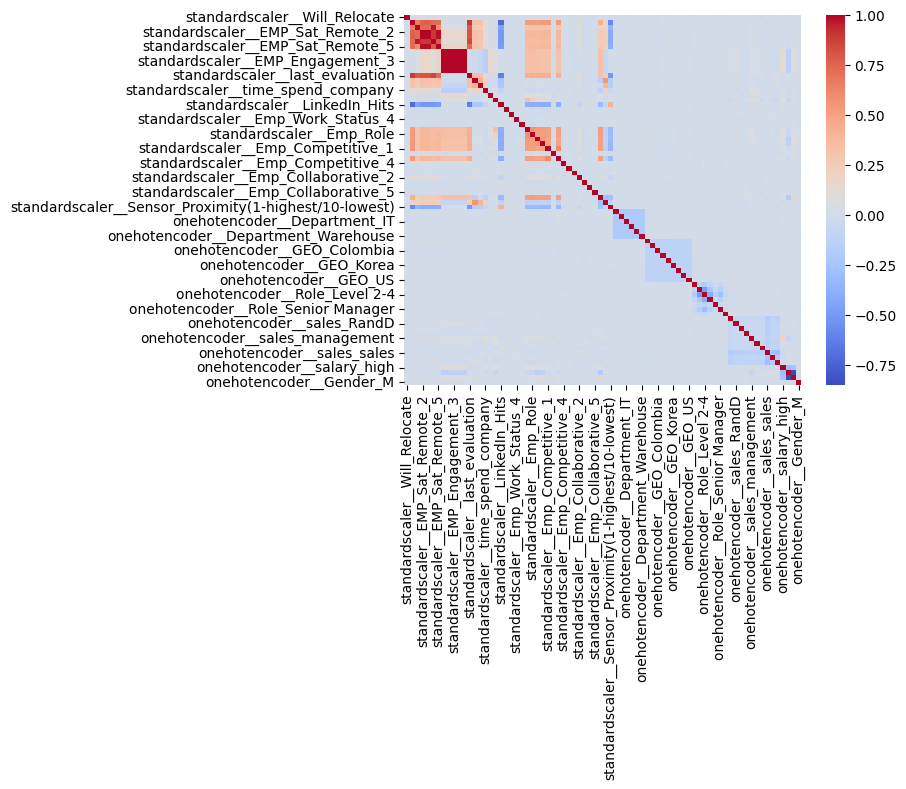

In [51]:
sns.heatmap(test.corr(), cmap='coolwarm')

# Define X_train, X_test, y_train, y_test

In [52]:
X.shape

(14999, 46)

In [53]:
X.describe()

,Will_Relocate,Percent_Remote,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.499833,0.617321,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,0.500017,0.193841,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,0.000000,0.400000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,0.000000,0.400000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,0.000000,0.800000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,1.000000,0.800000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,31.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,2.000000,2.000000,3.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000,4.000000,4.000000,4.000000,4893.000000,85.000000,8.000000
max,1.000000,1.000000,5.000000,5.000000,4.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,65.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,8500.000000,90.000000,10.000000


In [54]:
y.shape

(14999,)

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=88)

In [56]:
baseline_pipe.fit(X_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f639725ee90>),
                                                 ('onehotencoder',
                                                  OneHotEncoder(drop='if_binary',
                                                                sparse_output=False),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x7f639725e9b0>)]))])

In [59]:
# Cross-validate Pipeline
# cross_val_score(baseline_pipe, X, y, cv=10, scoring='accuracy')